In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [37]:
review = pd.read_json("/content/drive/MyDrive/RS_Ass_3/AMAZON_FASHION.json", lines=True)

In [38]:
review

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
883631,5,True,"02 21, 2017",A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200,NaN,NaN,NaN
883632,5,True,"11 25, 2016",A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000,2.0,NaN,NaN
883633,3,True,"11 10, 2016",A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,1478736000,NaN,NaN,NaN
883634,3,True,"11 10, 2016",A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,1478736000,NaN,NaN,NaN


In [39]:
review.shape

(883636, 12)

In [40]:
print(review.isnull().sum())

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          92
reviewText          1233
summary              533
unixReviewTime         0
vote              803736
style             579067
image             854829
dtype: int64


Here, we come to know that which of the column in our dataset contains how many Null/NaN Values

In [41]:
def normalization(df):
    df['unixReviewTime'] = pd.to_datetime(df['unixReviewTime'], unit ='s')
    df['overall'] = df['overall'].astype('int32')

def get_last_rev(df):
    return df['unixReviewTime'].max()

def get_first_rev(df):
    return df['unixReviewTime'].min()


In [42]:
normalization(review)
review.sample(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
421187,3,True,"07 25, 2016",A1GJNV1DKF4LLJ,B005P1JR1W,Carlos,Not bad,Three Stars,2016-07-25,NaN,NaN,NaN
694468,3,True,"04 26, 2017",AWC8AQKF0NFTG,B0148U9ZUS,kahli Johnson,When I first got the XL I was 187 pounds and w...,Now at 155 pounds I can finally fit the XL and...,2017-04-26,NaN,NaN,NaN
729733,5,True,"04 18, 2016",A23G4KYRZ7253Q,B016YY46U0,Patty Dirks,Great,Five Stars,2016-04-18,NaN,NaN,NaN
643020,1,True,"12 23, 2016",A3FPYUYVPBXR18,B00XO8SFFM,Tom Steinbach,Used the belt almost everyday for 3 months des...,loved it. Eventually,2016-12-23,NaN,NaN,[https://images-na.ssl-images-amazon.com/image...
332966,5,True,"07 26, 2016",A7AM9D8CPIBGL,B017N7I17Q,Tyana,Looks gorgeous I wore this on my poconos trip ...,... wore this on my poconos trip it was a nice...,2016-07-26,NaN,{'Color:': ' Faux Mink - Black'},NaN
497166,5,True,"05 26, 2017",A3JNOYVW72H3M3,B00IAJJGHQ,Manuel Prez,Excellent,Five Stars,2017-05-26,NaN,NaN,NaN
238807,3,True,"09 23, 2015",A99FA06X9P2HC,B00RGCLYYQ,susan rodgers,Nice,Three Stars,2015-09-23,NaN,NaN,NaN
336480,5,True,"12 16, 2016",AHHY15U4B53O3,B017Z6YBZ6,Bay Area,Very cute. Looks well made and sized appropri...,"Cute, would recommend",2016-12-16,NaN,{'Size:': ' 6/6X'},NaN
449808,2,True,"02 3, 2014",A1HYK5L30RWRV4,B00C1A9RJC,Bobbi S.,Would look so nice on my ear but it is too sma...,ear cuff wrap,2014-02-03,NaN,NaN,NaN
119034,5,True,"04 27, 2014",A1RO56A7EAYL3Q,B00CW0AEOI,jfgolden,A big hot,I love it,2014-04-27,NaN,NaN,NaN


In [43]:
get_last_rev(review)

Timestamp('2018-10-01 00:00:00')

Here we got when this category was reviewed for the first time in our Dataset

In [44]:
get_first_rev(review)

Timestamp('2002-11-11 00:00:00')

Here we got when this category was reviewed for the last time in our Dataset

These Start and End Dates will help us understanding the Graphs that depends on these dates

In [58]:
def rearrange_dates(df, df_2002=None, df_2003=None, df_2004=None, df_2005=None, df_2006=None, df_2007=None, df_2008=None, df_2009=None, df_2010=None, df_2011=None, df_2012=None, df_2013=None, df_2014=None, df_2015=None, df_2016=None, df_2017=None, df_2018=None):
    # Rating according to Years
    df_2002 = df[df['unixReviewTime'] <= '2002-12-31']
    df_2003 = df[(df['unixReviewTime'] > '2002-12-31') & (df['unixReviewTime'] <= '2003-12-31')]
    df_2004 = df[(df['unixReviewTime'] > '2003-12-31') & (df['unixReviewTime'] <= '2004-12-31')]
    df_2005 = df[(df['unixReviewTime'] > '2004-12-31') & (df['unixReviewTime'] <= '2005-12-31')]
    df_2006 = df[(df['unixReviewTime'] > '2005-12-31') & (df['unixReviewTime'] <= '2006-12-31')]
    df_2007 = df[(df['unixReviewTime'] > '2006-12-31') & (df['unixReviewTime'] <= '2007-12-31')]
    df_2008 = df[(df['unixReviewTime'] > '2007-12-31') & (df['unixReviewTime'] <= '2008-12-31')]
    df_2009 = df[(df['unixReviewTime'] > '2008-12-31') & (df['unixReviewTime'] <= '2009-12-31')]
    df_2010 = df[(df['unixReviewTime'] > '2009-12-31') & (df['unixReviewTime'] <= '2010-12-31')]
    df_2011 = df[(df['unixReviewTime'] > '2010-12-31') & (df['unixReviewTime'] <= '2011-12-31')]
    df_2012 = df[(df['unixReviewTime'] > '2011-12-31') & (df['unixReviewTime'] <= '2012-12-31')]
    df_2013 = df[(df['unixReviewTime'] > '2012-12-31') & (df['unixReviewTime'] <= '2013-12-31')]
    df_2014 = df[(df['unixReviewTime'] > '2013-12-31') & (df['unixReviewTime'] <= '2014-12-31')]
    df_2015 = df[(df['unixReviewTime'] > '2014-12-31') & (df['unixReviewTime'] <= '2015-12-31')]
    df_2016 = df[(df['unixReviewTime'] > '2015-12-31') & (df['unixReviewTime'] <= '2016-12-31')]
    df_2017 = df[(df['unixReviewTime'] > '2016-12-31') & (df['unixReviewTime'] <= '2017-12-31')]
    df_2018 = df[(df['unixReviewTime'] > '2017-12-31') & (df['unixReviewTime'] <= '2018-12-31')]
    
    return df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018


In [59]:
def getting_years_avg_ratings(df):    
    df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018 = rearrange_dates(df)
    dfs_2_18 = [df_2002['overall'], df_2003['overall'], df_2004['overall'], df_2005['overall'], df_2006['overall'], df_2007['overall'], df_2008['overall'], df_2009['overall'], df_2010['overall'], df_2011['overall'], df_2012['overall'], df_2013['overall'], df_2014['overall'], df_2015['overall'], df_2016['overall'], df_2017['overall'], df_2018['overall']]
    dfs_2_18_avg_rating = [x_df.mean() for x_df in dfs_2_18 if len(x_df)!=0]
    dfs_years = [x for x in range(2018, 2001, -1)]
    dfs_years = sorted(dfs_years[:len(dfs_2_18_avg_rating)])   
    return dfs_years, dfs_2_18_avg_rating

In [45]:
def cal_pro_avg_rating(df):
    grouped_df = df.groupby(['asin'])['overall'].agg(['count','mean']).reset_index()
    return grouped_df.round({'mean': 1})

In [46]:
def rating_his_gr(df, log = False):
    df['overall'].hist(bins = [0.5,1.5,2.5,3.5,4.5,5.5], log = log, figsize = (12,6), grid = True, color = '#03A89E')
    plt.title("Customer-Rating Graph")
    plt.xlabel("Rating")
    plt.ylabel("Number of Ratings")
    plt.show()

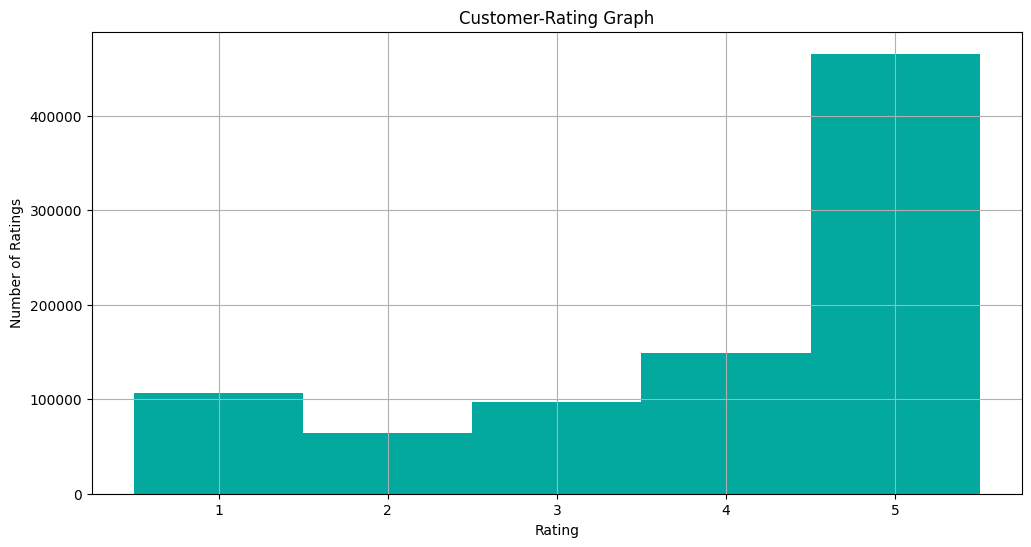

In [47]:
rating_his_gr(review)

This Graph tells us about the frequency of a specific rating

From this we can conclude that most of the people liked Magazine from Amazon and some are just satisfied. But it's important to not that more than 10000 people hated this service. That's why Amazon should analyze where the actual flaws are, whether they are in Products or they are in quality of service including user interfaces

In [48]:
def rating_box_plt(df):
    sns.boxplot(x = 'overall', data = df, whis = 5, color = 'None', showmeans = True, meanline = True)

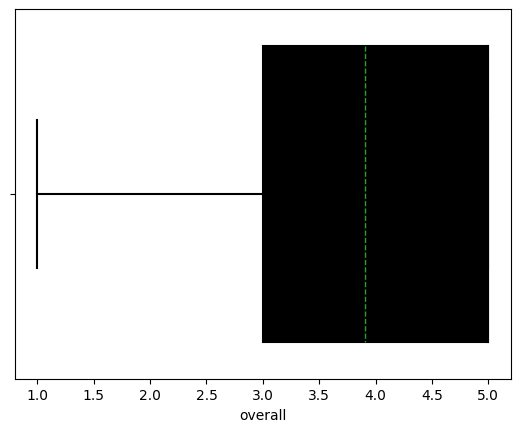

In [49]:
rating_box_plt(review)

BoxPlot tells us where most of the data lies

Here we can see that rating one to four constitute half of the data and the rest is just constituted by rating five. From that we can say that half of the audience loves the product of this category while other half has different opinions according to their experience

In [50]:
def rating_violinplt(df):
    sns.violinplot(y = 'overall', data = df, bw = 0.1, color ='#872657')

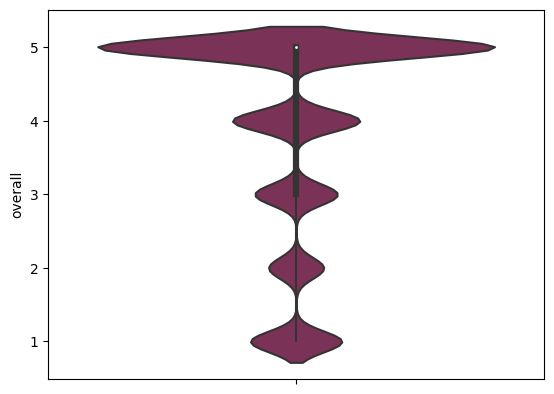

In [51]:
rating_violinplt(review)

Violin Plot provides us with some extra info about data distribution, i.e. Concentration of data points, distribution of data points

Here we can see that most of the population of Data lies in 5 Star rating, that is more denser than 4 Star and 1 Star gradually. Thus we can say most of the audience loves the product of this category

In [52]:
def product_graph_most_sold(df, log = False):
    df = cal_pro_avg_rating(df).nlargest(30, 'count')

    fig = px.bar(df, y='count', x='asin', text='mean', log_y=log)
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                      autosize=False,
                      width=900, height=600,
                      margin=dict(l=20, r=50, t=50, b=20),
                      title='Product Frequency with Average Rating',
                      xaxis_title="Product",
                      yaxis_title="Frequency")
    fig.show()

In [53]:
product_graph_most_sold(review)

This Graph tells us about the frequency of a specific product being rated/reviewed in terms of Most Selling Product

These are the top 40 Products that have the highest frequency of reviews with their Average Rating. It also infers that these products bought by the same number of customers. However it is possible that any of the above product is not sold by that number but got reviews. That's another case, we will discuss it later. However, according to the reviews, the products are the hotest in this category.

In [54]:
def verified_rev_gr(df, log = False):
    df.verified.value_counts().plot(kind = 'bar', log = log, figsize = (8,6), grid = True, color ="#8B2500" )
    plt.title("Verified-Frequency Graph")
    plt.xlabel("Verification Status")
    plt.ylabel("Frequency")
    plt.show()

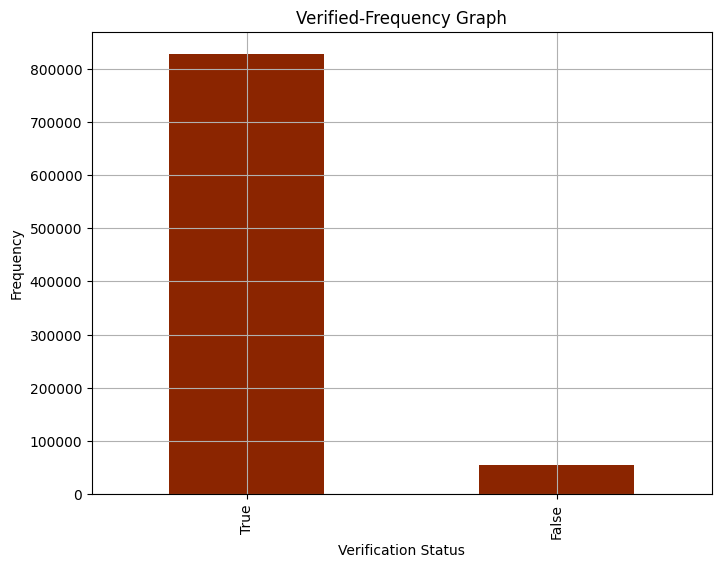

In [55]:
verified_rev_gr(review)

This Graph tells us about the frequency of Verified and Unverified reviews represented by True and False respectively. Let's understand what is meant by Verified and Unverified reviews on Amazon

An Amazon Verified Purchase review indicates that the author of the review bought the product on Amazon. It also means that they purchased the product at full price without a discount. Unverified reviews mean that the reviewers did not purchase the product on the Amazon marketplace. It can also mean that the reviewer purchased the product at a discounted price. However, people review some of the products they have used before from elsewhere like, Movies, Books, etc, but people review it on Amazon sharing their thoughts that leads the reviews to unverified category which is not so useful according to Amazon's ranking algorithm

As you see that we were uncertain about the authencity of reviews, and we were supposing that these were the products which were purchased most/least by the customers. Above graph shows why we were a little uncertain. More than 30k reviews are not verified means whether they don't belong to the actual buyer or the product was purchased on discount. In this way fake reviews can get classified too with badge. However, reviews and their verification status are related. Let's come to know how strong this relationship is.

In [56]:
def df_corr_heatmap(df):
    corr = df.corr()
#   display(corr)
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap="Blues")

<ipython-input-56-28a4d00a23c5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



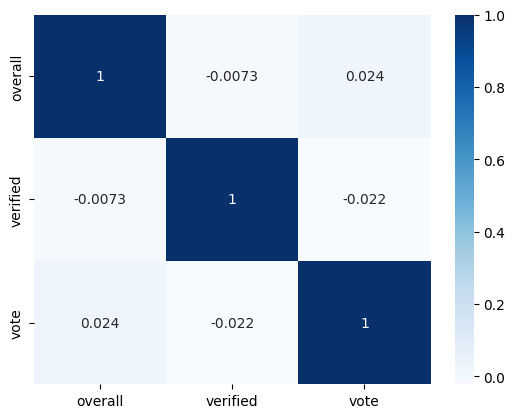

In [57]:
df_corr_heatmap(review)

This Correlation Heat-Map tells us the extent to which two variables are linearly related (meaning they change together at a constant rate). Thus we can show whether and how strongly variables are related with each other. Typically the value of correlation coefficient (r) ranges from (-1 to +1), with the following common relations


1.  r = 0 means no relation between variables
2.  r > 0 means Direct relation between variables
1.   r < 0 means Inverse relation between variables

Square the r value to get the realtion percentage
From above matrix we can find that relationship between verification status and review is about 0.02 %, that's is a really weak relation. But still they both are related. Obviously they are in direct relation means they will grow side by side. In simple words, more is the number of reviews more is the chance of a review being verified/unverified

In [60]:
def avg_rating_graph(df):
    dfs_years, dfs_2_18_avg_rating = getting_years_avg_ratings(df)
    fig, ax = plt.subplots(figsize=(14,7))
    ax.set(xlabel = "Years", ylabel = "Average Rating", title = "Average Rating Tracking")
    plt.xticks(dfs_years)
    plt.plot(dfs_years, dfs_2_18_avg_rating, color = '#4F2F4F')

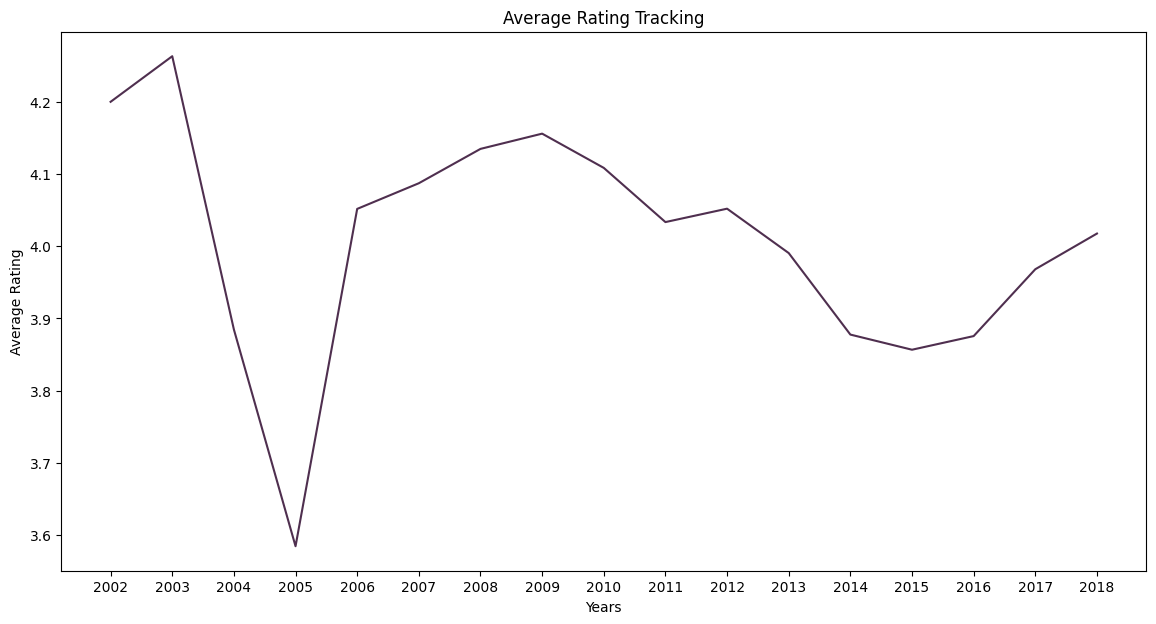

In [61]:
avg_rating_graph(review)

In [62]:
def most_frequent_users_graph(df, log=False):
    df['reviewerID'].value_counts().nlargest(30).plot(kind='bar', log=log, figsize=(14,7), grid=True, color="#A5435C")
    plt.title("Reviewer-Frequency Graph")
    plt.xlabel("Consumer / Reviewer ID")
    plt.ylabel("Number of Reviews")
    plt.show()

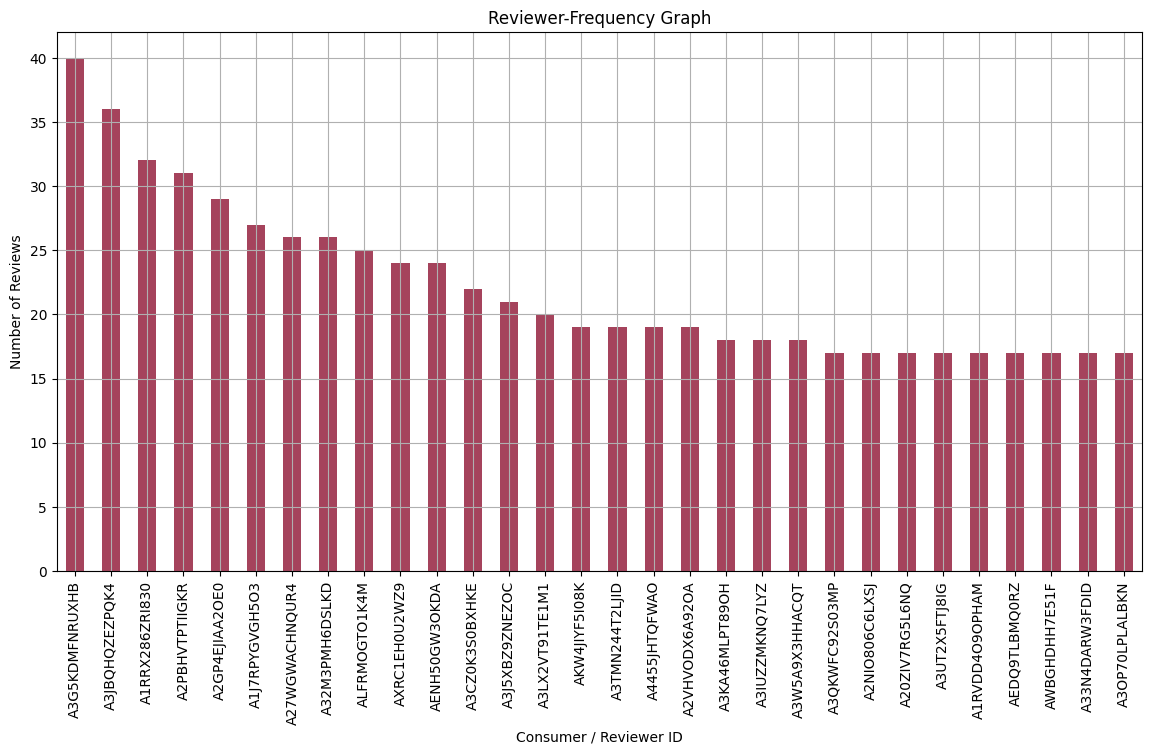

In [63]:
most_frequent_users_graph(review)

Above graph shows how many reviews are how much helpful. For example there are more than 1k reviews that got helpful vote for only 2 times and there are less than 100 reviews that got helpful vote 30 times. From this we can conclude that in general frequency of reviews decreases as they get helpful vote. We can also conclude that so much irrelevant reviews are making more helpful reviews unfindable. So reviewers should review properly so that it can add value to someone's purchases

In [66]:
df_verify = review.dropna()

In [67]:
df_verify.shape

(5079, 12)

In [68]:
def vote_helpfulness_graph(df):
    df_verify['vote'].value_counts().nlargest(30).plot(kind='bar', log=True, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Helfulness of Review Graph")
    plt.xlabel("Number of Votes a Review is Helpfull")
    plt.ylabel("Frequency")
    plt.show()
    
    df_verify['vote'].value_counts().nsmallest(30).plot(kind='bar', log=True, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Helfulness of Review Graph")
    plt.xlabel("Number of Votes a Review is Helpfull")
    plt.ylabel("Frequency")
    plt.show()

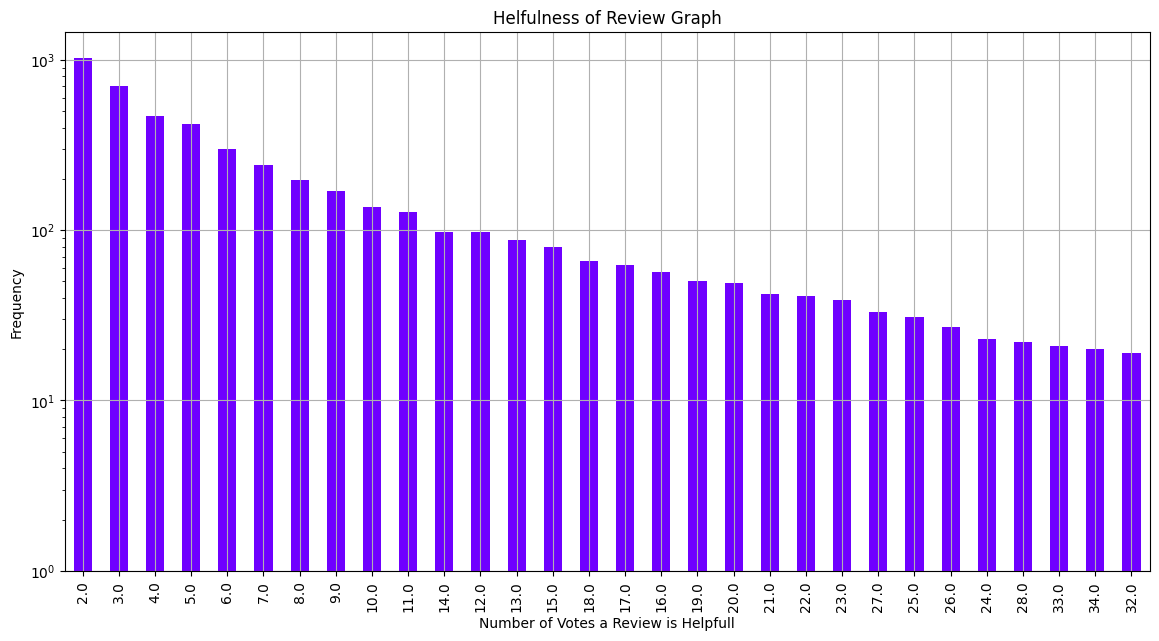

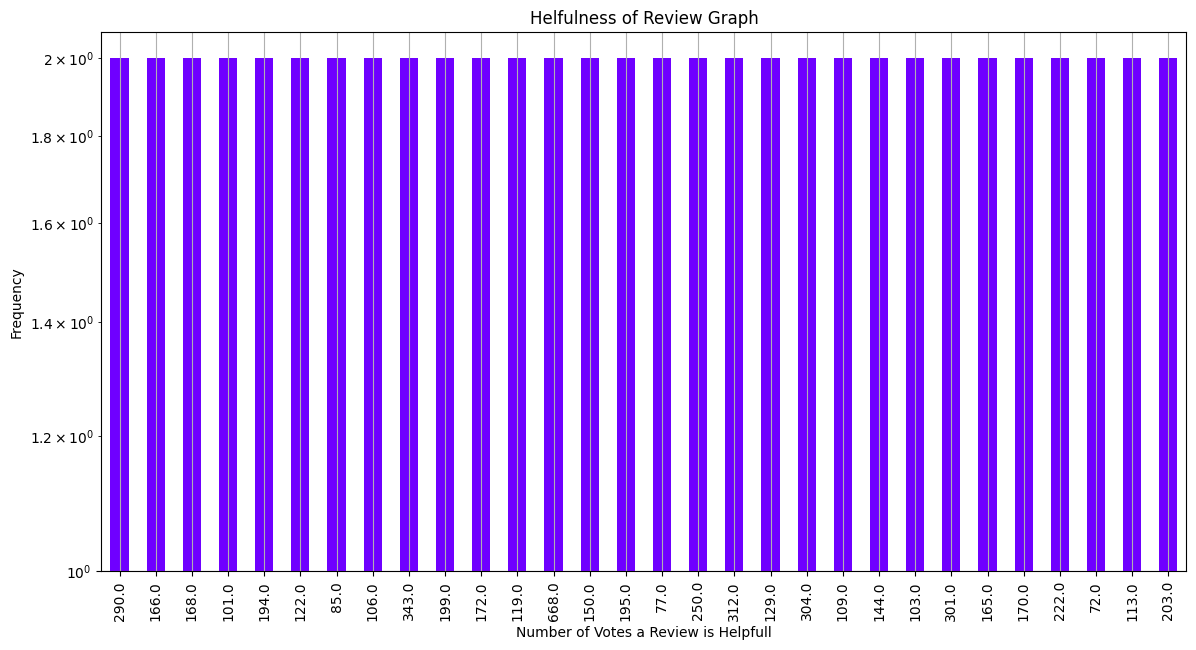

In [69]:
vote_helpfulness_graph(review)

Above graph shows frequency of reviewers with the same uncertainity discussed for verified/unverified reviews. Amazon can give them discounts, or gift cards or any other related discounts to get more purchases from them. For least frequency users, Amazon can figure out the cause why those users are not purchasing products from Amazon, using surveys, feedbacks, reporting or anyother technique, to improve Amazon productivity.